In [3]:
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))
datset is downloaded from kaggle:https://www.kaggle.com/datasets/somyaagarwal69/gold-forecasting

Python version: 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.1
matplotlib version: 3.5.1
NumPy version: 1.21.5
SciPy version: 1.7.3
IPython version: 8.2.0
scikit-learn version: 1.0.2
seaborn version: 0.11.2


This model will help us in knowing that how Crude oil price, interest rate (repo rate), Indian currency price in dollars, Sensex (BSE), Inflation rate and US Dollar index will follow a relationship with the gold price directly or indirectly.

The regression analysis in which we use one dependent variable and multiple independent variables is called a multivariate regression analysis. The forecasting plays an important role in econometrics and also helps to determine government policies with optimality. The business decision which are dependent on the prices of such commodities can make benefits from a feasible prediction

In [4]:
path="C:\\***\\**\\***\\GoldUP.csv"

In [5]:
df=pd.read_csv(path)

In [6]:
df.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
series=pd.DataFrame(data=df['Gold_Price'], columns=["Gold_Price"]).dropna() #creating a series of cold price onnly


In [13]:
series.head()

,Gold_Price
0,4538
1,4483
2,4541
3,4466
4,4370


Text(0, 0.5, 'Time Series')

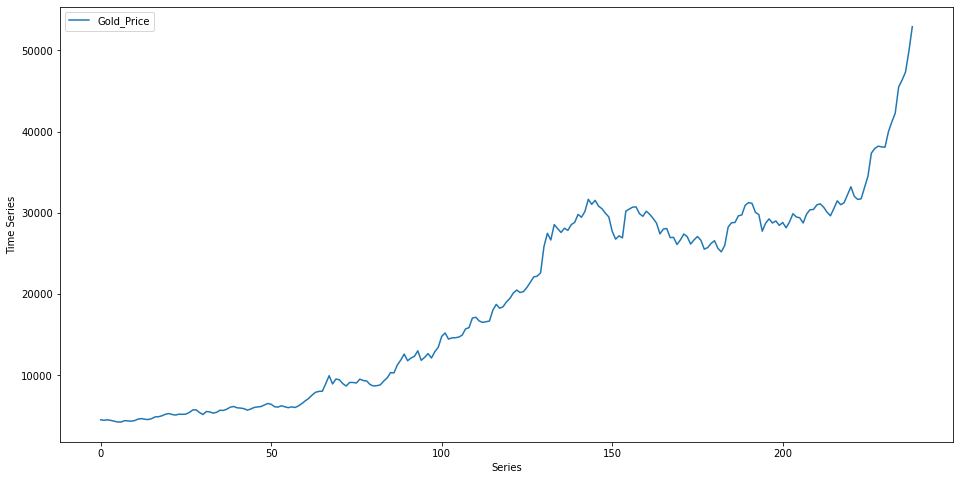

In [14]:
series.plot(figsize=(16,8)) #plotting a gold price series 
plt.xlabel("Series")
plt.ylabel("Time Series")

In [15]:
df.shape

(239, 8)

In [16]:
df.describe() #describe a value of a dataset 

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,19299.062762,3397.686318,6.715900,53.804819,18172.443891,73.372050,90.182510
std,11668.913490,1551.627401,1.188309,10.311144,11032.206600,29.106141,11.312607
min,4267.000000,887.420000,4.250000,39.366685,2811.600000,36.730000,71.800000
25%,6712.500000,2180.695000,6.000000,45.467395,8263.400000,45.190000,81.110000
50%,19056.000000,3303.550000,6.000000,48.664774,17464.810000,68.470000,88.940000
75%,29364.000000,4492.930000,7.000000,63.861030,26662.395000,101.370000,97.160000
max,52917.000000,6926.830000,10.250000,76.222334,41253.740000,129.300000,120.240000


C:\Users\sharu\anaconda3\envs\Pandas_kl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness :%f 0.2488536311924413
Kurtosis:%f -0.9958473995497061


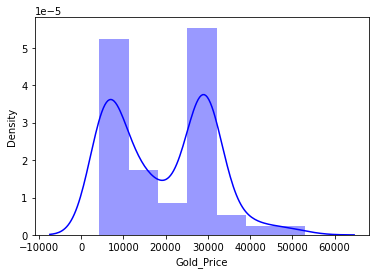

In [17]:
sns.distplot(df["Gold_Price"], color="blue")
print("skewness :%f", df["Gold_Price"].skew())
print("Kurtosis:%f", df["Gold_Price"].kurt())#measuring the skewness and kurtosis with distplot

# Additive decomposition

In [18]:
result1=seasonal_decompose(series.values, model='additive', period=30)

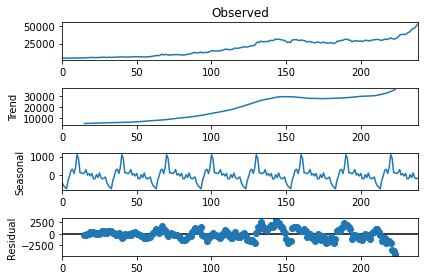

In [19]:
result1.plot();

plt.show()

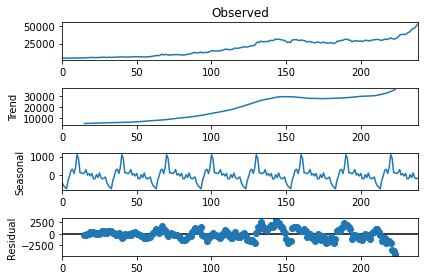

In [20]:
result2=seasonal_decompose(series.values, model='multiplicative', period=30)
result1.plot();
plt.show()

In [23]:
features=["Crude_Oil","Interest_Rate","USD_INR","Sensex","CPI","USD_Index"]
x = df[features]
y = df.Gold_Price

In [24]:
x.head()

,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [25]:

y.head()

0    4538
1    4483
2    4541
3    4466
4    4370
Name: Gold_Price, dtype: int64

### plot gold prices against other variable one by one

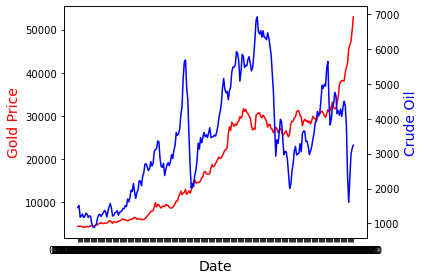

In [26]:
fig,ax=plt.subplots()
ax.plot(df.Date, df.Gold_Price, color="red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Gold Price", color="red", fontsize=14)
ax2=ax.twinx()
ax2.plot(df.Date,df.Crude_Oil, color="blue")
ax2.set_ylabel("Crude Oil", color="blue", fontsize=14)
plt.tight_layout()



Text(0, 0.5, 'USD_INR')

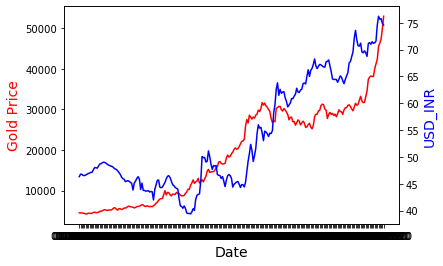

In [27]:
fig,ax=plt.subplots()
ax.plot(df.Date, df.Gold_Price, color="red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Gold Price", color="red", fontsize=14)
ax2=ax.twinx()
ax2.plot(df.Date,df.USD_INR, color="blue")
ax2.set_ylabel("USD_INR", color="blue", fontsize=14)



Text(0, 0.5, 'Sensex')

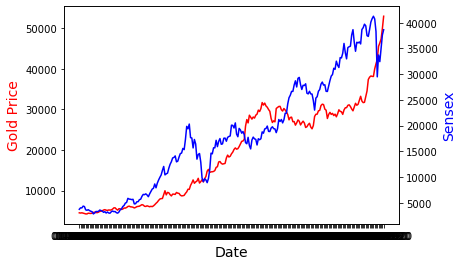

In [28]:
fig,ax=plt.subplots()
ax.plot(df.Date, df.Gold_Price, color="red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Gold Price", color="red", fontsize=14)
ax2=ax.twinx()
ax2.plot(df.Date,df.Sensex, color="blue")
ax2.set_ylabel("Sensex", color="blue", fontsize=14)


Text(0, 0.5, 'CPI')

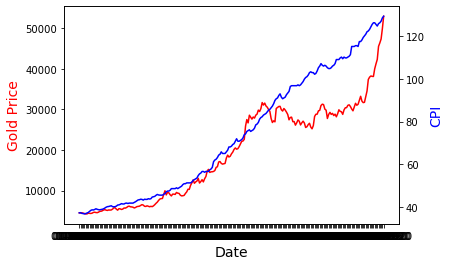

In [29]:
fig,ax=plt.subplots()
ax.plot(df.Date, df.Gold_Price, color="red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Gold Price", color="red", fontsize=14)
ax2=ax.twinx()
ax2.plot(df.Date,df.CPI, color="blue")
ax2.set_ylabel("CPI", color="blue", fontsize=14)


Text(0, 0.5, 'USD_Index')

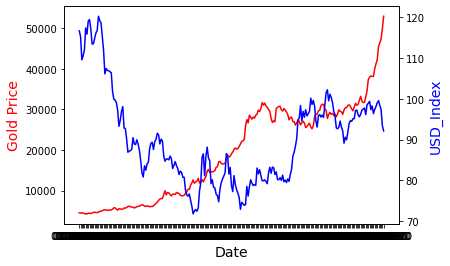

In [30]:
fig,ax=plt.subplots()
ax.plot(df.Date, df.Gold_Price, color="red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Gold Price", color="red", fontsize=14)
ax2=ax.twinx()
ax2.plot(df.Date,df.USD_Index, color="blue")
ax2.set_ylabel("USD_Index", color="blue", fontsize=14)


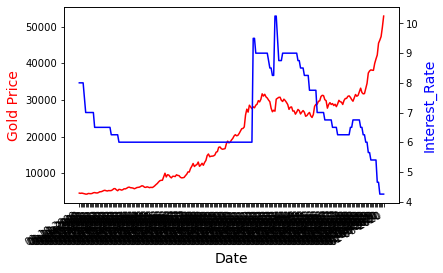

In [31]:
fig,ax=plt.subplots()
ax.plot(df.Date, df.Gold_Price, color="red")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Gold Price", color="red", fontsize=14)
ax2=ax.twinx()
ax2.plot(df.Date,df.Interest_Rate, color="blue")
ax2.set_ylabel("Interest_Rate", color="blue", fontsize=14)
fig.autofmt_xdate()

In [32]:
#scatter_plots


<AxesSubplot:xlabel='Sensex', ylabel='Gold_Price'>

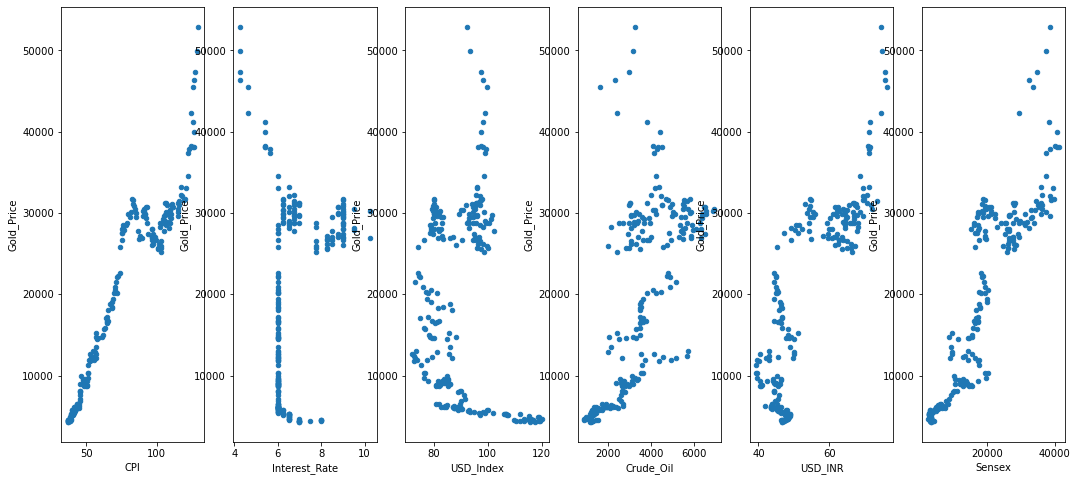

In [33]:
fig,axis=plt.subplots(1,6)
df.plot(kind="scatter", x="CPI", y="Gold_Price", ax=axis[0], figsize=(18,8))
df.plot(kind="scatter", x="Interest_Rate", y="Gold_Price", ax=axis[1])
df.plot(kind="scatter", x="USD_Index", y="Gold_Price", ax=axis[2])
df.plot(kind="scatter", x="Crude_Oil", y="Gold_Price", ax=axis[3])
df.plot(kind="scatter", x="USD_INR", y="Gold_Price", ax=axis[4])
df.plot(kind="scatter", x="Sensex", y="Gold_Price", ax=axis[5])

In [34]:
#defining a Multiregression model and apply linear regression model


In [35]:
gldr=LinearRegression()
gldr.fit(x,y)
print("gldr_interceptio:%f", gldr.intercept_)
print("gldr_ceefficient:%f", gldr.coef_)

gldr_interceptio:%f -2544.5153361400044
gldr_ceefficient:%f [ 1.27661583e+00 -7.23404537e+02 -2.89155123e+02 -6.85908153e-01
  6.96709372e+02 -8.11774161e+00]


In [36]:
#goodeness_of_fit:prediction


In [37]:
ypredict=gldr.predict(x)

In [38]:
print('Predicted vales of Gold Price \n', ypredict) 

Predicted vales of Gold Price 
 [ 2579.33910557  2387.85434111  1805.86182489  1598.16824557
  1965.50688922  2686.95082648  2936.69380043  3079.94239169
  3485.57359264  3770.55846746  4097.82145337  4179.85024401
  4195.20459938  4095.23121075  3943.95366568  3706.61668602
  3433.77751928  3822.41459854  4069.58817291  4407.46857855
  4538.24178766  5112.71822685  5269.15866937  5589.59843296
  5713.50448213  5666.97723729  5533.35740087  5817.02139642
  6030.8603887   6236.08261525  6435.53611388  6661.10210977
  6731.60315291  6983.78990931  6692.67118139  6453.15061932
  6614.10197432  6577.60720402  5970.56115538  6299.1307729
  6364.88838332  6591.82856509  6836.803889    7595.24070072
  7597.34653766  7633.39914876  8085.83407958  7979.67985077
  8956.34563633  7884.7984587   7566.05875079  8077.21382932
  8054.80981408  8529.75566321  8958.76636182  8333.88204543
  8418.79447926  8790.40627246  9555.71012136  8547.47350315
  9024.84227338  8306.42404498  7775.21128452  8018.74

In [39]:
cc=pd.DataFrame(ypredict)

In [40]:
cc.head

<bound method NDFrame.head of                 0
0     2579.339106
1     2387.854341
2     1805.861825
3     1598.168246
4     1965.506889
..            ...
234  37843.416394
235  40350.488819
236  40029.942565
237  39745.100576
238  39799.729935

[239 rows x 1 columns]>

In [41]:
gp=df.Gold_Price

Text(0, 0.5, 'price of actual gold and predicted price')

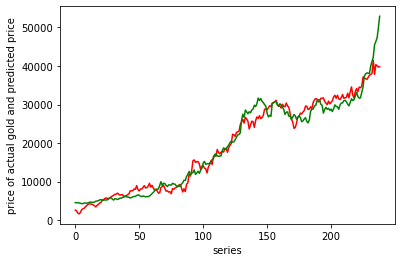

In [42]:
#predictedvsactualgoldprice

plt.plot(ypredict, color="red");
plt.plot(gp, color="green")
plt.xlabel("series")
plt.ylabel("price of actual gold and predicted price")


In [43]:
#mean squared error and coefficient of determination

In [44]:
mse=mean_squared_error(y, ypredict)

In [45]:
print("mean squared error:", mse)

mean squared error: 5208187.864580983


In [46]:
cd=gldr.score(x,y)
print("coefficent of determination:", cd) #0.9 seems to be well predicted model

coefficent of determination: 0.9615897843964092


In [47]:
#summary of statistical model
goldModel = smf.ols(formula = "Gold_Price~Crude_Oil+Interest_Rate+USD_INR+Sensex+CPI+USD_Index" ,data = df).fit()
goldModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     968.0
Date:                Sun, 24 Jul 2022   Prob (F-statistic):          3.99e-161
Time:                        23:28:01   Log-Likelihood:                -2187.3
No. Observations:                 239   AIC:                             4389.
Df Residuals:                     232   BIC:                             4413.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2544.5153   1966.871     -1.294      0.197   -6419.727    1330.696
Crude_Oil         1.2766      0.219      5.831      0.000       0.845       1.708
Interest_Rate  -723.4045    183.305     -3.946      0.000   -1084.559    -362.250
USD_INR        -289.1551     75.904     -3.809      0.000    -438.704    -139.606
Sensex           -0.6859      0.063    -10.856      0.000      -0.810      -0.561
CPI             696.7094     41.806     16.665      0.000     614.341     779.078
USD_Index        -8.1177     26.742     -0.304      0.762     -60.806      44.571
==============================================================================
Omnibus:                       97.388   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.720
Skew:                           1.623   Prob(JB):                     1.19e-91
Kurtosis:                       8.614   Cond. No.                     2.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
test = df['Gold_Price'][200:]
train = df['Gold_Price'][:200]

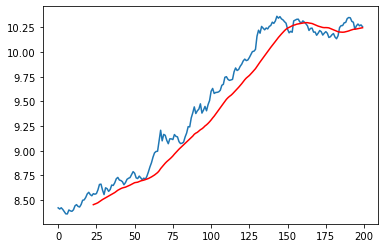

In [49]:
train_log = np.log(train) 
test_log = np.log(test)
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [50]:
from statsmodels.tsa.arima_model import ARIMA


In [51]:
import statsmodels.api as sm

In [52]:
model = sm.tsa.arima.ARIMA(df["Gold_Price"], order=(1,1,2))
result = model.fit()

In [53]:
print(result)

In [54]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             Gold_Price   No. Observations:                  239
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1906.688
Date:                Sun, 24 Jul 2022   AIC                           3821.376
Time:                        23:28:04   BIC                           3835.265
Sample:                             0   HQIC                          3826.974
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9806      0.031     31.343      0.000       0.919       1.042
ma.L1         -0.7800      0.073    -10.731      0.000      -0.922      -0.638
ma.L2         -0.1019      0.071     -1.442      0.1

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\sharu\anaconda3\envs\Pandas_kl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


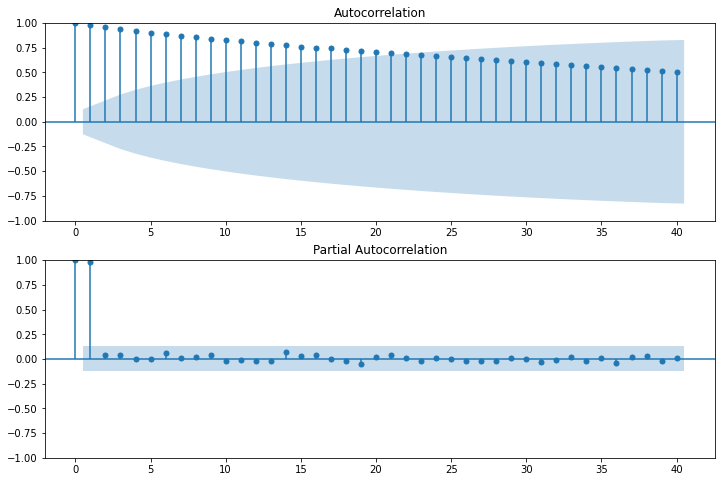

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Gold_Price'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Gold_Price'].dropna(),lags=40,ax=ax2)

#### Time series analysis on Air Passengers data

In [57]:
path1=path="C:\\**\\**\\**\\AirPassengers.csv"

In [58]:
dfs=pd.read_csv(path1, parse_dates=True)

In [59]:
dfs.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [60]:
dfs.columns

Index(['Month', '#Passengers'], dtype='object')

In [61]:
dfs.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [62]:
dfs.shape

(144, 2)

In [63]:
dfs.dropna(inplace=True)
dfs.shape

(144, 2)

In [64]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [65]:
dfs.rename({"#Passengers": "Passengers"}, axis =1, inplace=True) #rename the passenger columns

In [66]:
dfs.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [68]:
import datetime

In [69]:
dfs['Month'] =  pd.to_datetime(dfs['Month'], infer_datetime_format=True) #conver month to proper date format

In [70]:
dfs.set_index("Month", inplace=True)
 #set month as index

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
series=dfs.Passengers.values

In [74]:
series

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [75]:
# ADF Test
result = adfuller(dfs["Passengers"], autolag='AIC')

In [76]:
def adfuller_test(dfs):
    result=adfuller(dfs)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(dfs['Passengers'])

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : 0.8153688792060423
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations : 130


In [77]:
dfs["passengerfirstdiff"]=dfs["Passengers"]-dfs["Passengers"].shift(1) #let do differencing with one
dfs.head()

,Passengers,passengerfirstdiff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [78]:
dfs.dropna(inplace=True) #drop the na value arises after differencing

In [79]:
adfuller_test(dfs['passengerfirstdiff']) #need to do more differencing to get value less than 0.05

ADF Test Statistic : -2.8292668241699874
p-value : 0.05421329028382711
#Lags Used : 12
Number of Observations : 130


In [80]:
dfs["passengerthird"]=dfs["Passengers"]-dfs["Passengers"].shift(2) #differencing with two

In [81]:

dfs.dropna(inplace=True)

In [82]:
dfs

,Passengers,passengerfirstdiff,passengerthird
Month,,,
1949-04-01,129,-3.0,11.0
1949-05-01,121,-8.0,-11.0
1949-06-01,135,14.0,6.0
1949-07-01,148,13.0,27.0
1949-08-01,148,0.0,13.0
...,...,...,...
1960-08-01,606,-16.0,71.0
1960-09-01,508,-98.0,-114.0
1960-10-01,461,-47.0,-145.0


In [83]:
adfuller_test(dfs['passengerthird']) #final p-value is less than 0.05

ADF Test Statistic : -2.9414812512932165
p-value : 0.04073257688675956
#Lags Used : 11
Number of Observations : 129


<AxesSubplot:xlabel='Month'>

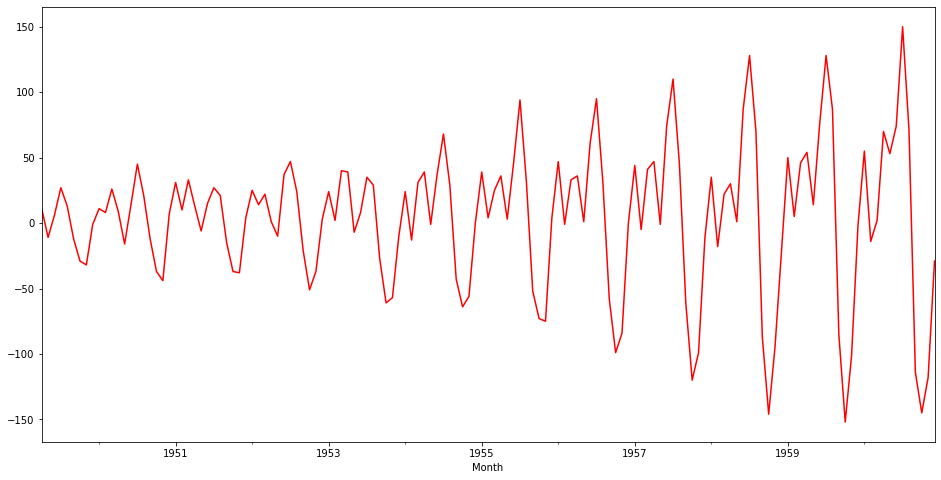

In [84]:
dfs["passengerthird"].plot(figsize=(16,8), color="red") 

C:\Users\sharu\anaconda3\envs\Pandas_kl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


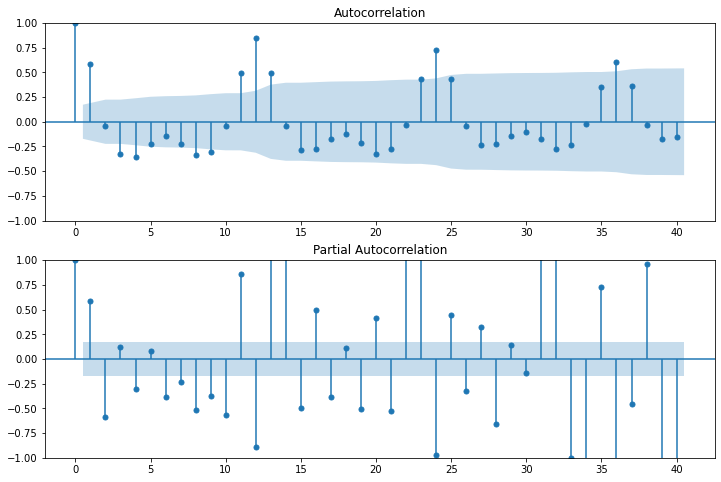

In [100]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #to determine p,q,d parameter
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfs['passengerthird'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfs['passengerthird'].dropna(),lags=40,ax=ax2)


In [86]:
dfs["passengerseconddiff"]=dfs["Passengers"]-dfs["Passengers"].shift(12) #test if this seasonal data

In [87]:
dfs.dropna(inplace=True)

In [88]:
adfuller_test(dfs['passengerseconddiff'])

ADF Test Statistic : -3.491213819675393
p-value : 0.008215629837362742
#Lags Used : 1
Number of Observations : 127


In [89]:
dfs.head()

,Passengers,passengerfirstdiff,passengerthird,passengerseconddiff
Month,,,,
1950-04-01,135,-6.0,9.0,6.0
1950-05-01,125,-10.0,-16.0,4.0
1950-06-01,149,24.0,14.0,14.0
1950-07-01,170,21.0,45.0,22.0
1950-08-01,170,0.0,21.0,22.0


<AxesSubplot:xlabel='Month'>

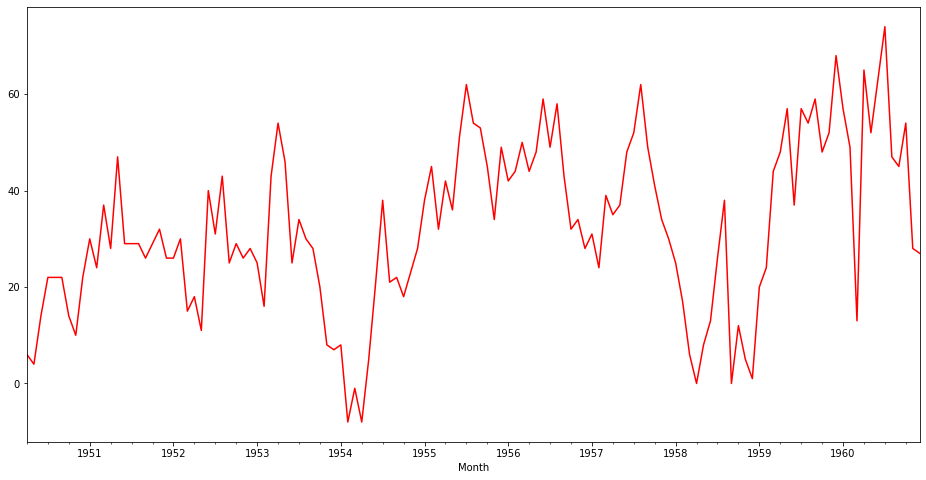

In [101]:
dfs["passengerseconddiff"].plot(figsize=(16,8), color="red") #data seems to seasonal

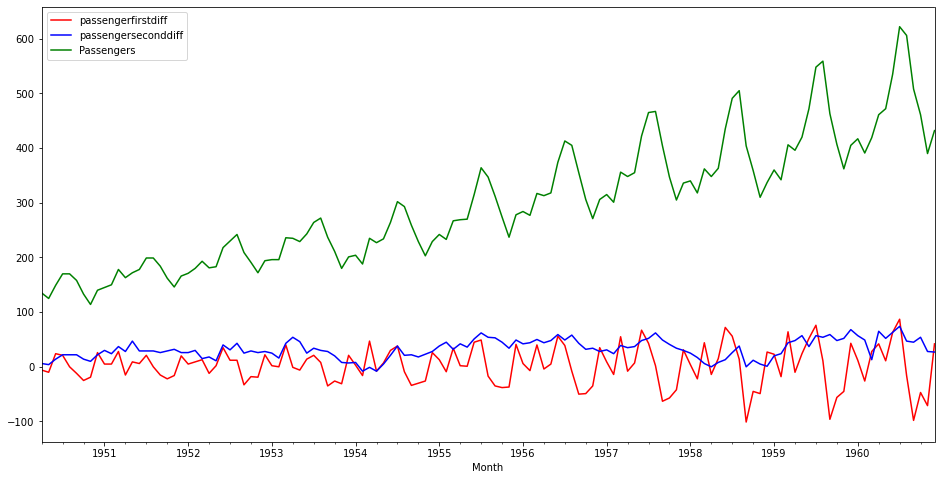

In [90]:
dfs["passengerfirstdiff"].plot(color="red",figsize=(16,8))
dfs["passengerseconddiff"].plot(figsize=(16,8), color="blue")
dfs["Passengers"].plot(color="green",figsize=(16,8))
plt.legend()

C:\Users\sharu\anaconda3\envs\Pandas_kl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


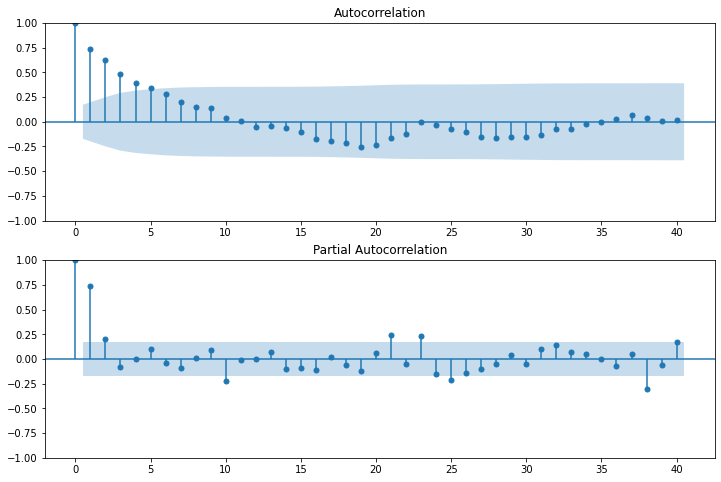

In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfs['passengerseconddiff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfs['passengerseconddiff'].dropna(),lags=40,ax=ax2)


C:\Users\sharu\anaconda3\envs\Pandas_kl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sharu\anaconda3\envs\Pandas_kl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sharu\anaconda3\envs\Pandas_kl\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

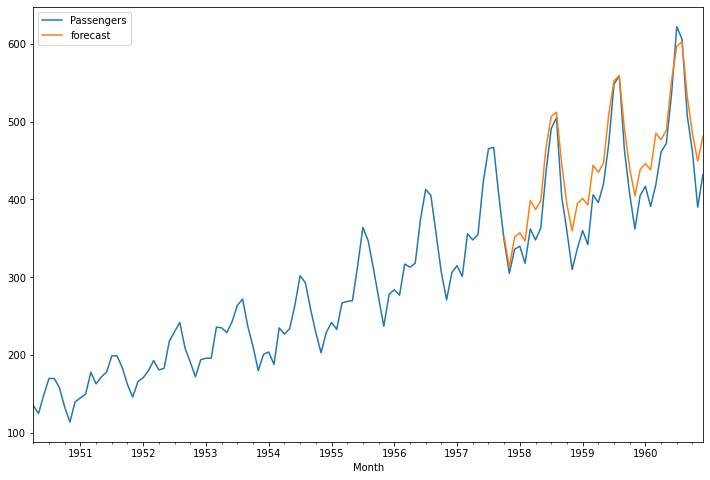

In [108]:
import statsmodels.api as sm #appy sarima for seasonal data
model=sm.tsa.statespace.SARIMAX(dfs['Passengers'],order=(2, 1, 6),seasonal_order=(1,1,1,12))
results=model.fit()
dfs['forecast']=results.predict(start=90,end=130,dynamic=True)
dfs[['Passengers','forecast']].plot(figsize=(12,8))